# TD - TP 2 Apprentissage supervisé - **PIVOT REMY LOUA**

# Régression et classification

##  Exercice 1 : Régression linéaire 

### 1) Importez les modules nécessaires

In [232]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [233]:
import warnings
warnings.filterwarnings('ignore')

In [234]:
plt.rcParams['figure.figsize'] = [12,8]

### 2) Construisez un jeu de données formé de m échantillons

In [235]:
np.random.seed(0)
m=100
X = np.linspace(0,10,m).reshape(m,1)
y = X + np.random.randn(m,1)

X  represente les `features`  et Y  represente le `Label ou Target` 

### 3) Affichez le nuage de points

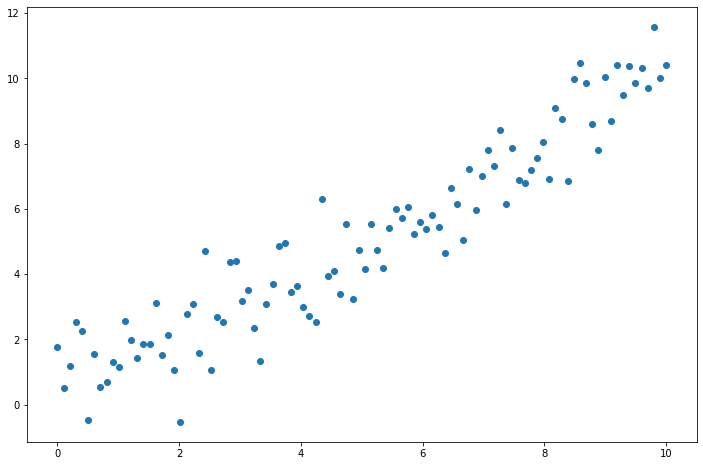

In [236]:
plt.scatter(X,y)

nous avons donc nos nuages de point avec nos variables,  nous avons une variable continue, ce qui conforme le choix d'un modèle de 
regression linéaire bien adapté pour le problème en regardant dans le tableau de choix du modèle sur la première page

### 4) On souhaite représenter ce nuage de points par un modèle de régression linéaire

In [237]:
model = LinearRegression()

### 4.a) Entrainement du model

In [238]:
model.fit(X,y)

LinearRegression()

#### 4.b Evaluation du model

In [239]:
print("Nous avons un score de : ",model.score(X,y))

Nous avons un score de :  0.8881140743377214


Cette valeur correspond au coefficient de determination de la méthodes des moindres carrées

#### 4.c) Superposez sur le nuage de points,

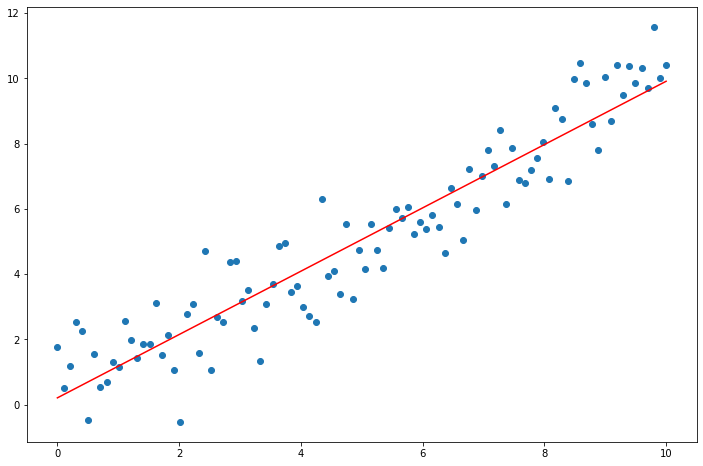

In [240]:
plt.scatter(X,y)
plt.plot(X,model.predict(X),c='r')

#### 4.d) Commentez les résultats.

Avec la supperposition nous avons bien une confirmation de la bonne prediction et une droite de regression qui suis bien le nuages de points, tout en reduisant l'erreur mse.
Nous obtenons donc un score de 88%

### 5) Construisez un nouveau jeu de données formé de m échantillons

In [241]:
np.random.seed(0)
m=100
X = np.linspace(0,10,m).reshape(m,1)
y = X**2 + np.random.randn(m,1)

### 6) Affichez le nuage de points

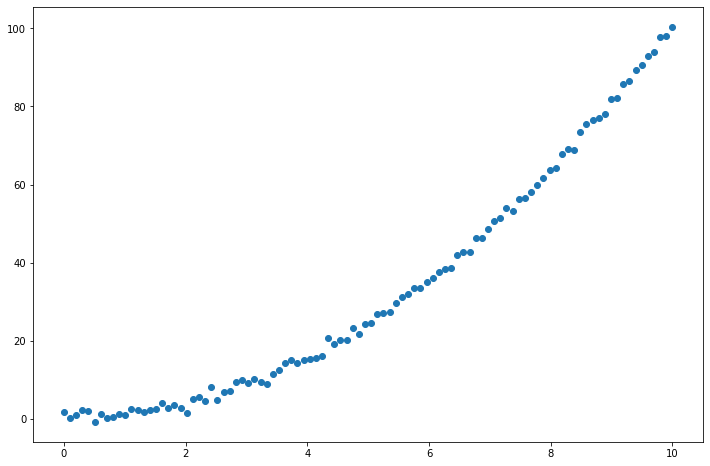

In [242]:
plt.scatter(X,y)

Sur la figure ci-dessus nous avons bien la confirmation que les données du dataset ne sont pas linéaire

### 7) On souhaite représenter ce nuage de points par un modèle de régression linéaire 

In [243]:
model = LinearRegression()

#### 7.a) Identifiez les caractéristiques du modèle

In [244]:
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

#### 7.b) Entrainement du model

In [245]:
model.fit(X,y)

LinearRegression()

#### 7.c) Evaluation du model

In [246]:
model.score(X,y)

0.928782407186839

Nous avons bien une apprentissage reussie

#### 7.d) Superposez  sur  le  nuage  de  points

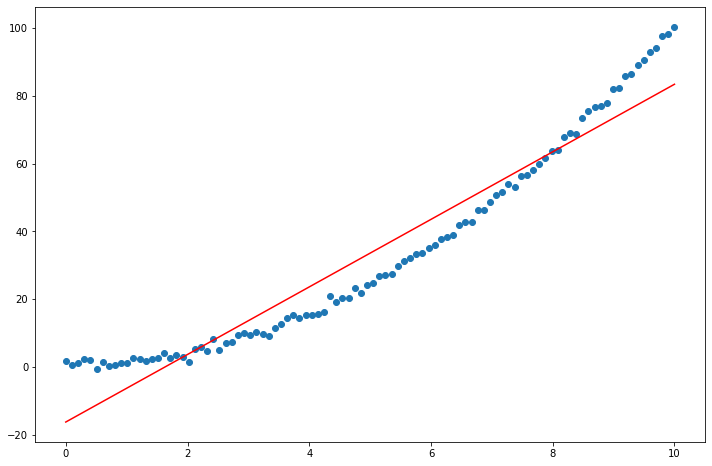

In [247]:
plt.scatter(X,y)
plt.plot(X,model.predict(X),c='r')

#### 7.e) Commentez les résultats

Nous avons un apprentissage reussie mais en regardant la figure ci-desssus, nous remarquons que le model n'est pas bien adapté au dataset, il faut donner partir sur un notre model car le modèle de regression linéaire n'est pas adapté dans notre cas.

### 8) Pour remédier au problème de la question précédente

In [248]:
from sklearn.svm import SVR

In [249]:

model = SVR(C=100)

#### 8.a) Identifiez les caractéristiques du modèle

In [250]:
model.get_params()

{'C': 100,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

#### 8.b) Entrainement du model

In [251]:
model.fit(X,y)

SVR(C=100)

#### 8.c) Evaluation

In [252]:
model.score(X,y)

0.9989763625652847

#### 8.d) tracez le  modèle  prédit

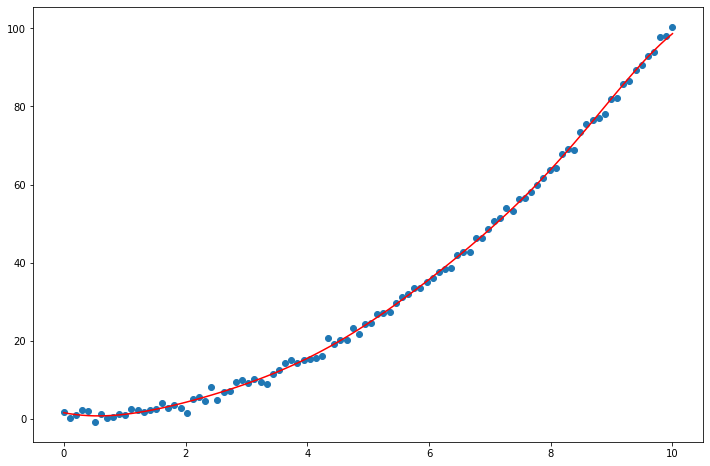

In [253]:
plt.scatter(X,y)
plt.plot(X,model.predict(X),c='r')

#### 8.e) Commentez les résultas

Nous avons un apprentissage reussi, et une bonne prediction en choissisant le modèle SVM

## Exercice 2 : Classification KNN 

In [254]:
import pandas as pd
import seaborn as sns

### 2) Téléchargez le jeu de données du Titanic en utilisant seaborn

In [255]:
titanic = sns.load_dataset("titanic")

In [256]:
print("Dimensions :", titanic.shape)

Dimensions : (891, 15)


### 3) Analysez ce jeu de données en vous appuyant sur Titanic.head()

In [257]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

on peut voir sur le tableau ci-dessous les features et les targets

### 4) On souhaite nettoyer ce jeu de données

#### 4.a) Sélectionnez uniquement les colonnes [‘survived, ‘pclass’,’sex’,’age’]

In [258]:
titanic = titanic[['survived', 'pclass', 'sex', 'age']] # selection des colonnes 
titanic.head()

survived  pclass     sex   age
0         0       3    male  22.0
1         1       1  female  38.0
2         1       3  female  26.0
3         1       1  female  35.0
4         0       3    male  35.0

Dans le sex nous avons des chaine de caractères , il faut donc numeriser

#### 4.b) Supprimez les données manquantes

In [259]:
titanic.dropna(axis=0, inplace=True)    # on elimine les données manquantes dans le dataset

#### 4.c) Numérisez le jeu de données. Remplacez par exemple ‘male’ par zéro et ‘female’ par un

In [260]:
# remplacement de "male" et "female" par 0 et 1 car les calcul se font sur les nombres, donc male=0 et female=1
titanic['sex'].replace(['male', 'female'], [0, 1], inplace=True) 

In [261]:
titanic.head()

survived  pclass  sex   age
0         0       3    0  22.0
1         1       1    1  38.0
2         1       3    1  26.0
3         1       1    1  35.0
4         0       3    0  35.0

#### 4.e) Vérifiez que jeu de données est bien numérisé

Nous avons des données bien numérisées

#### 4.f) On a un tableau pandas, il va falloir qu’on le divise en deux tableaux X et y

In [262]:
X = titanic.drop('survived', axis=1)
y = titanic['survived']

X  represente les `features`  et y  represente le `Label ou Target` 

#### 4.g) sélectionnez le modèle de classification KNeighborsClassifier 

les données du dataset nous permettre de commprendre qu'on a un problème de classification, il faut donc choisir un modèle de classification

In [263]:
from sklearn.neighbors import KNeighborsClassifier

In [264]:
model = KNeighborsClassifier()

#### 4.e) Entrainez le modèle

In [265]:
model.fit(X, y) # entrainement du modele

KNeighborsClassifier()

#### 4.d Evaluation

In [266]:
model.score(X, y) # évaluation

0.8319327731092437

Nous avons un score de 83%

### 5) Etant donné que le modèle est entrainé, il s’agit maintenant de prédire la survie d’un passager


#### 5.a) Construisez une fonction « survie » 

In [267]:
def survie(model, pclass=3, sex=0, age=26):
  x = np.array([pclass, sex, age]).reshape(1, 3)
  print(model.predict(x))

#### 5.b) Avec les paramètres pclass=3, sex=0, age=26, le passager a t-il survécu (survie(model)) ?

In [268]:
survie(model,pclass=3, sex=0, age=26)


[0]


Le passager n'a pas Survécu

#### 5.c Calculez la probabilité pour appartenir à la classe 0 et à la classe 1

In [269]:
def survie(model, pclass=3, sex=0, age=26):
  x = np.array([pclass, sex, age]).reshape(1, 3)
  print(model.predict(x))
  print(model.predict_proba(x))

In [270]:
survie(model,pclass=3, sex=0, age=26)

[0]
[[0.6 0.4]]


Nous avons une probabilité de 0.6 de non-survie et 0.4 pour la survie.

### 6) Faites varier le nombre de voisins de 1 à 10 du modèle KNeighborsClassifier

In [271]:
from sklearn.model_selection import GridSearchCV


In [272]:
param_grid = {'n_neighbors': np.arange(1, 10)}

In [273]:
Grid = GridSearchCV(KNeighborsClassifier(), param_grid)

In [274]:
Grid.fit(X, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [275]:
print(Grid.best_score_)
print(Grid.best_params_)

0.7647099379493746
{'n_neighbors': 3}


#### 6.a) Retenez le nombre de voisin qui donne le meilleur score

In [276]:
model = Grid.best_estimator_

#### 6.b) Qu’en est-il de la prédiction de survie ? 

In [277]:
survie(model,pclass=3, sex=0, age=26)

[0]
[[0.66666667 0.33333333]]


Non-survie
Nous avons une probabilité de 0.66 de Non-survie et 0.33 pour la survie.